## Distributed Square Attack against DeepAPI

Paper link: https://arxiv.org/abs/1912.00049

In [70]:
from bat.attacks import SquareAttack
from bat.apis.deepapi import DeepAPI_Resnet50_ImageNet

In [71]:
import numpy as np
np.set_printoptions(suppress=True)

from PIL import Image

## Step 1: Load image and make predictions

In [72]:
# Load Image 
x = np.array(Image.open("cat.jpg").convert('RGB'))

In [73]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

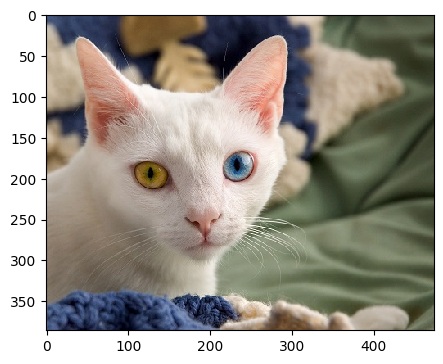

In [74]:
plt.figure(figsize = (5, 5))
plt.imshow(x, interpolation='nearest')

In [75]:
# Initialize the DeepAPI Model
model = DeepAPI_Resnet50_ImageNet("http://localhost:8080")

In [76]:
# Get Preditction
x = np.array([x])
y_pred = model.predict(x)[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))


Egyptian_cat                   0.49968
lynx                           0.22562
Siamese_cat                    0.04539
sleeping_bag                   0.02621
swab                           0.02131
tabby                          0.01624
tiger_cat                      0.01408
carton                         0.00794
bow_tie                        0.00789
bonnet                         0.00700
zucchini                       0.00000
zebra                          0.00000
yurt                           0.00000
yellow_lady's_slipper          0.00000
yawl                           0.00000
wreck                          0.00000
worm_fence                     0.00000
wool                           0.00000
wooden_spoon                   0.00000
wood_rabbit                    0.00000
wombat                         0.00000
wolf_spider                    0.00000
wok                            0.00000
wire-haired_fox_terrier        0.00000
wing                           0.00000
wine_bottle             

In [77]:
def dense_to_onehot(y, n_classes):
    y_onehot = np.zeros([len(y), n_classes], dtype=bool)
    y_onehot[np.arange(len(y)), y] = True
    return y_onehot

In [78]:
y_target_onehot = dense_to_onehot(np.array([np.argmax(y_pred)]), n_classes=len(y_pred))


## Step 2: Apply the Square Attack

In [79]:
square_attack = SquareAttack(model)

In [80]:
x_adv, _ = square_attack.attack(x, y_target_onehot, False, epsilon = 0.05, max_it=3000, concurrency=8)

Clean accuracy: 100.00%


Distributed Square Attack (Vertical):   3%|▎         | 11/375 [00:08<04:53,  1.24it/s, Total Queries=205, Average Margin=-.00684, Attack Success Rate=1, Avg Queries=205]


Suceessfully found adversarial examples for all examples


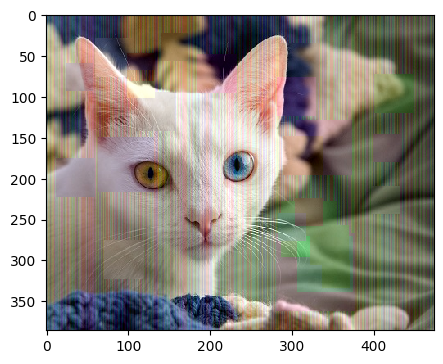

In [83]:
plt.figure(figsize = (5, 5))
plt.imshow(x_adv[0].astype(np.uint8), interpolation='nearest')

In [82]:
# Get predictions after attack
y_adv = model.predict(x_adv)[0]

# Print result
model.print(y_adv)
print()
print('Prediction', np.argmax(y_adv), model.get_class_name(np.argmax(y_adv)))


Siamese_cat                    0.18094
Egyptian_cat                   0.17410
lynx                           0.06671
tabby                          0.06101
window_screen                  0.05383
sleeping_bag                   0.04500
bow_tie                        0.04399
plastic_bag                    0.03904
tiger_cat                      0.03729
quilt                          0.02102
zucchini                       0.00000
zebra                          0.00000
yurt                           0.00000
yellow_lady's_slipper          0.00000
yawl                           0.00000
wreck                          0.00000
worm_fence                     0.00000
wool                           0.00000
wooden_spoon                   0.00000
wood_rabbit                    0.00000
wombat                         0.00000
wolf_spider                    0.00000
wok                            0.00000
wire-haired_fox_terrier        0.00000
wing                           0.00000
wine_bottle             